# Day-46 Exponential Smoothing Models

Welcome to Day 46! We're sticking with forecasting, but today we're moving from the complex world of ARIMA to the beautifully simple and often incredibly effective world of Exponential Smoothing Models.

These models are the hidden heroes of forecasting, especially for quick, reliable predictions on large numbers of time series (like product sales).

## Topics Covered:
- Exponential Smoothing

## The Core Idea: Exponential Smoothing


All exponential smoothing methods are based on one simple premise: recent observations are more important than older observations for predicting the future.

The models use a smoothing parameter, $\alpha$ (alpha), to assign exponentially decreasing weights to older data points. The formula is:

$ F_{t+1} = \alpha Y_t + (1-\alpha) F_t $

Where:

- $ F_{t+1} $  is the forecast for the next period.

- $ Y_t $  is the actual observation at the current period.

- $ F_t $ is the previous forecast for the current period.

- $\alpha$ is the smoothing factor (0<$\alpha$<1).

If $\alpha$ is close to 1, the model places heavy weight on the most recent observation ($Y_t$ ). If α is close to 0, the model places heavy weight on the past forecast $(F_t)$, meaning the forecast changes very slowly.

## 1.Simple Exponential Smoothing (SES)

Use Case: Only for time series with No Trend and No Seasonality (i.e., just level and noise).

- `Concept`: It only models the level of the time series. It assumes the next value will be close to the weighted average of all past values, giving more weight to recent ones.

- `Analogy`: Imagine a weather forecaster predicting tomorrow's temperature. If they use SES, they would simply focus on today's temperature and yesterday's forecast. They wouldn't consider if the temperature has been steadily rising (trend) or if it's always hot in August (seasonality).

## 2. Holt’s Linear Trend Method

Use Case: For time series with a Trend but No Seasonality.

Holt's method extends Simple Exponential Smoothing by adding a second smoothing parameter, $\beta$ (beta), to account for the trend.

It has two smoothing equations:

- Level Equation ($\alpha$): Smooths the level of the series.

- Trend Equation ($\beta$): Smooths the trend (the difference between the current level and the previous level).

`Analogy`: Now, the weather forecaster notes that the temperature has been increasing by an average of 0.5C every day for the last two weeks. The model uses $\alpha$ to estimate the base temperature and $\beta$ to estimate the expected increase in temperature.

## 3. Holt-Winters (Triple Exponential Smoothing)

Use Case: The most complete model—for time series with Level, Trend, AND Seasonality.

Holt-Winters (often just called "Triple Smoothing") extends Holt's method by adding a third smoothing parameter, $\gamma$ (gamma), to account for seasonality.

It has three smoothing equations:

    - Level Equation ($\alpha$): Smooths the base level.

    - Trend Equation ($\beta$): Smooths the slope.

    - Seasonal Equation ($\gamma$): Smooths the seasonal component (e.g., the average value for January).

- Additive vs. Multiplicative: Just like decomposition, Holt-Winters can be Additive (if seasonality is constant) or Multiplicative (if seasonality increases with the trend).

    - Multiplicative Holt-Winters is the most commonly used because seasonal variations usually grow with the series' overall level.

- `Analogy`: The forecaster now uses $\alpha$ for the base temperature, $\beta$ for the upward trend, AND $\gamma$ for the fact that every August is predictably 10C warmer than the yearly average.

C:\Users\amey9\AppData\Local\Temp\ipykernel_46084\1170885119.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2020', periods=100, freq='M')


Holt-Winters Additive Model Fitted Successfully!


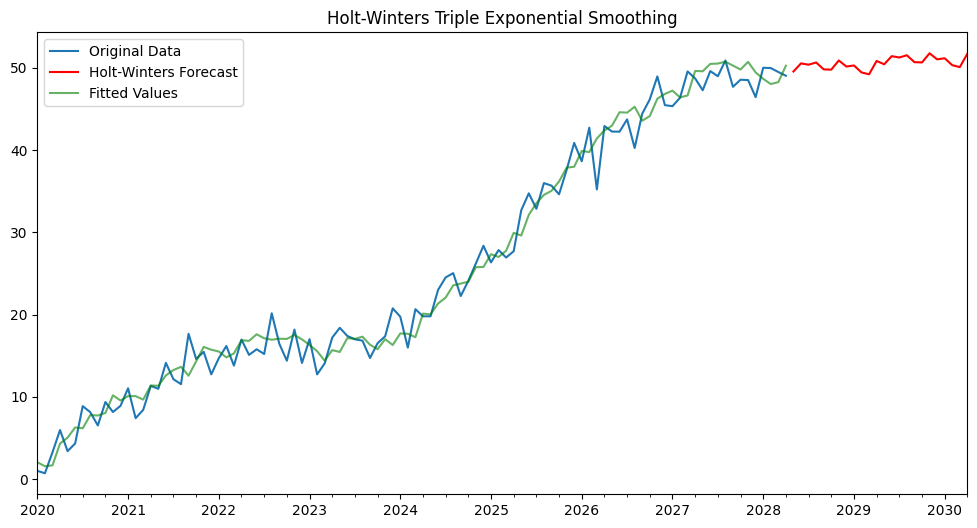

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

# --- 1. Recreate/Load your Time Series ---
np.random.seed(42) 
index = pd.date_range(start='2020', periods=100, freq='M')
# Data includes a trend, seasonality, and noise, and might contain negatives
data = 5 * np.sin(np.linspace(0, 3*np.pi, 100)) + np.arange(100) * 0.5 + np.random.randn(100) * 2
ts = pd.Series(data, index=index)

# 2. Define the model with the FIX: seasonal='add'
model = ExponentialSmoothing(
    ts, 
    trend='add', 
    seasonal='add', # <--- FIXED: Switched to Additive Model
    seasonal_periods=12
)

# 3. Fit the model and generate a forecast
results = model.fit()

# The model will now run successfully!
print("Holt-Winters Additive Model Fitted Successfully!")
# 3. Forecast the next 24 months (2 years)
forecast = results.forecast(24)

# 4. Plot the results
plt.figure(figsize=(12, 6))
ts.plot(label='Original Data')
forecast.plot(label='Holt-Winters Forecast', color='red')
results.fittedvalues.plot(label='Fitted Values', color='green', alpha=0.6)

plt.title('Holt-Winters Triple Exponential Smoothing')
plt.legend()
plt.show()